 # Multiclass Classification of Sentiment in Movie Reviews 

In this section, sentence-level features are extracted from the raw dataset `aclLmdb` or the IMDB movie reviews dataset, which contains a set of 50,000 reviews.

25,000 of these records are labeled positive and 25,000 of them are labeled negative regarding to the sentiment conveyed.

In [1]:
import os
import re
import regex
import copy
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\users\za'cha'r'y\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Data Loading and Prepocessing (SAME AS aspect-segmentation part)

In [2]:
base_root = "./aclImdb/"

## Read sentences from train and test

In [3]:
# all dir spec
train_pos_dir = base_root + "train/pos/"
test_pos_dir = base_root + "test/pos/"
train_neg_dir = base_root + "train/neg/"
test_neg_dir = base_root + "test/neg/"
all_dir = [train_pos_dir,test_pos_dir,train_neg_dir,test_neg_dir]

# iterate all file names
train_pos_file_list = list()
test_pos_file_list = list()
train_neg_file_list = list()
test_neg_file_list = list()
all_file_list = [train_pos_file_list,test_pos_file_list,train_neg_file_list,test_neg_file_list]

for i in range(len(all_dir)):
  for filename in os.listdir(all_dir[i]):
    f_loc = os.path.join(all_dir[i], filename)
    all_file_list[i].append(f_loc)
all_file_list[3]

['./aclImdb/test/neg/0_2.txt',
 './aclImdb/test/neg/10000_4.txt',
 './aclImdb/test/neg/10001_1.txt',
 './aclImdb/test/neg/10002_3.txt',
 './aclImdb/test/neg/10003_3.txt',
 './aclImdb/test/neg/10004_2.txt',
 './aclImdb/test/neg/10005_2.txt',
 './aclImdb/test/neg/10006_2.txt',
 './aclImdb/test/neg/10007_4.txt',
 './aclImdb/test/neg/10008_4.txt',
 './aclImdb/test/neg/10009_3.txt',
 './aclImdb/test/neg/1000_3.txt',
 './aclImdb/test/neg/10010_2.txt',
 './aclImdb/test/neg/10011_1.txt',
 './aclImdb/test/neg/10012_1.txt',
 './aclImdb/test/neg/10013_4.txt',
 './aclImdb/test/neg/10014_2.txt',
 './aclImdb/test/neg/10015_4.txt',
 './aclImdb/test/neg/10016_3.txt',
 './aclImdb/test/neg/10017_1.txt',
 './aclImdb/test/neg/10018_1.txt',
 './aclImdb/test/neg/10019_1.txt',
 './aclImdb/test/neg/1001_4.txt',
 './aclImdb/test/neg/10020_1.txt',
 './aclImdb/test/neg/10021_3.txt',
 './aclImdb/test/neg/10022_4.txt',
 './aclImdb/test/neg/10023_4.txt',
 './aclImdb/test/neg/10024_3.txt',
 './aclImdb/test/neg/10025

In [4]:
# read in sentences
# read in their labels
# dict : key: cid, value: [sentence, score label]
class_volumn = 12500
train_pos_sentence_dict = dict()
test_pos_sentence_dict = dict()
train_neg_sentence_dict = dict()
test_neg_sentence_dict = dict()
train_unsup_sentence_dict = dict()
all_dict_info = [train_pos_sentence_dict,test_pos_sentence_dict,train_neg_sentence_dict,test_neg_sentence_dict]

bag = 1
for i in range(len(all_file_list)):
  count = 0
  for file_loc in all_file_list[i]:

    sentence = open(file_loc,"r").read().strip()
    
    try:
      id_score = regex.findall("/[0-9]*_[0-9]*.txt",file_loc)[0] # ['/11500_10.txt']
    except Exception:
      continue
    else:
      id, score = id_score.lstrip("/").rstrip(".txt").split("_") #['11500', '10']
    
      all_dict_info[i][id] = [sentence, score]
      
    # deal with sample data
      count += 1
      print("Loading dict "+str(bag)+" : "+str(count))
    
    if count == class_volumn:
      break

  bag += 1

Loading dict 1 : 1
Loading dict 1 : 2
Loading dict 1 : 3
Loading dict 1 : 4
Loading dict 1 : 5
Loading dict 1 : 6
Loading dict 1 : 7
Loading dict 1 : 8
Loading dict 1 : 9
Loading dict 1 : 10
Loading dict 1 : 11
Loading dict 1 : 12
Loading dict 1 : 13
Loading dict 1 : 14
Loading dict 1 : 15
Loading dict 1 : 16
Loading dict 1 : 17
Loading dict 1 : 18
Loading dict 1 : 19
Loading dict 1 : 20
Loading dict 1 : 21
Loading dict 1 : 22
Loading dict 1 : 23
Loading dict 1 : 24
Loading dict 1 : 25
Loading dict 1 : 26
Loading dict 1 : 27
Loading dict 1 : 28
Loading dict 1 : 29
Loading dict 1 : 30
Loading dict 1 : 31
Loading dict 1 : 32
Loading dict 1 : 33
Loading dict 1 : 34
Loading dict 1 : 35
Loading dict 1 : 36
Loading dict 1 : 37
Loading dict 1 : 38
Loading dict 1 : 39
Loading dict 1 : 40
Loading dict 1 : 41
Loading dict 1 : 42
Loading dict 1 : 43
Loading dict 1 : 44
Loading dict 1 : 45
Loading dict 1 : 46
Loading dict 1 : 47
Loading dict 1 : 48
Loading dict 1 : 49
Loading dict 1 : 50
Loading d

## Sentence Propocessing 

In [47]:
# stop words
closed_class_stop_words = ['a','the','an','and','or','but','about','above','after','along','amid','among',\
              'as','at','by','for','from','in','into','like','minus','near','of','off','on',\
              'onto','out','over','past','per','plus','since','till','to','under','until','up',\
              'via','vs','with','that','can','cannot','could','may','might','must',\
              'need','ought','shall','should','will','would','have','had','has','having','be',\
              'is','am','are','was','were','being','been','get','gets','got','gotten',\
              'getting','seem','seeming','seems','seemed',\
              'enough', 'both', 'all', 'your' 'those', 'this', 'these', \
              'their', 'the', 'that', 'some', 'our', 'no', 'neither', 'my',\
              'its', 'his' 'her', 'every', 'either', 'each', 'any', 'another',\
              'an', 'a', 'just', 'mere', 'such', 'merely' 'right', 'no', 'not',\
              'only', 'sheer', 'even', 'especially', 'namely', 'as', 'more',\
              'most', 'less' 'least', 'so', 'enough', 'too', 'pretty', 'quite',\
              'rather', 'somewhat', 'sufficiently' 'same', 'different', 'such',\
              'when', 'why', 'where', 'how', 'what', 'who', 'whom', 'which',\
              'whether', 'why', 'whose', 'if', 'anybody', 'anyone', 'anyplace', \
              'anything', 'anytime' 'anywhere', 'everybody', 'everyday',\
              'everyone', 'everyplace', 'everything' 'everywhere', 'whatever',\
              'whenever', 'whereever', 'whichever', 'whoever', 'whomever', 'he',\
              'him', 'his', 'her', 'she', 'it', 'they', 'them', 'its', 'their','theirs',\
              'you','your','yours','me','my','mine','i','we','us','much','and/or',\
              "do","does","did"        
              ]

# punctuations
puncs = list(string.punctuation)

# numbers
nums = [i for i in range(10)]


In [48]:
# diction input is all sentence in one aspect / train_pos.. etc.

# this is inplace preprocessing
def sentence_preprocess(diction):
  for id in diction.keys():
    sentence, _ = diction[id] # sent, score

    # make lower case and replace all "",'' first : "word"
    # remove HTML tags
    sent = sentence.lower().replace("\"","").replace("\'","").replace("\\","")
    sent = regex.sub(r'<.*?>', '',sent)
    sent_token = sent.split(" ")

    # remove stop words and puncs and nums and combinations and punc in tokens
    processed_token_list = []
    for token in sent_token:
      # nothing
      if 0 <= len(token) <= 1:
        continue
      # numeric
      elif token.isnumeric():
        continue
      # if is punc or contain punc in token
      elif len(set(token).intersection(set(puncs))) != 0:
        continue
      # finally all stop words 
      elif token in closed_class_stop_words:
        continue
      else:
        processed_token_list.append(token)

    diction[id] = [processed_token_list, _]

In [49]:
# preprocess for train . test，
# save copy for unprocessed
train_test_prepro = copy.deepcopy(all_dict_info)

for diction in train_test_prepro:
  sentence_preprocess(diction)

In [50]:
#  Convert the numeric score into grouped label
'''
[1,2]: 'Extra_Neg'
(2,4]: 'Neg' 
(6,8]: 'Pos'
(8,10]: 'Extra_Pos'
'''
for i in [0,1,2,3]:
  for key in train_test_prepro[i].keys():
    text = ' '.join(train_test_prepro[i][key][0]).strip()
    if int(train_test_prepro[i][key][1]) <= 2:
      label = 'Extra_Neg'
    elif int(train_test_prepro[i][key][1]) <= 4:
      label = 'Neg'
    elif int(train_test_prepro[i][key][1]) <= 8:
      label = 'Pos'
    else:
      label = 'Extra_Pos'
    train_test_prepro[i][key][0] = text
    train_test_prepro[i][key][1] = label


In [51]:
dataset = 1
print('ID         Sentence_Text             Label')
for i in train_test_prepro[dataset].keys():
  print(i + '     ' + train_test_prepro[dataset][i][0][:15]+'...     ' +train_test_prepro[dataset][i][1])

ID         Sentence_Text             Label
0     went saw movie ...     Extra_Pos
10000     actor turned di...     Pos
10001     recreational go...     Extra_Pos
10002     saw film sneak ...     Pos
10003     bill paxton tak...     Pos
10004     saw film septem...     Extra_Pos
10005     maybe im readin...     Pos
10006     felt film many ...     Pos
10007     movie amazing b...     Extra_Pos
10008     quitting exitin...     Pos
10009     loved movie beg...     Extra_Pos
1000     fortunate atten...     Extra_Pos
10010     first saw movie...     Extra_Pos
10011     time see deeply...     Extra_Pos
10012     wife mental hea...     Extra_Pos
10013     saw film rotter...     Extra_Pos
10014     night hunted st...     Pos
10015     youre fan jean ...     Pos
10016     surprised enjoy...     Pos
10017     went night hunt...     Pos
10018     certainly seen ...     Pos
10019     cartoon made ol...     Pos
1001     despite title u...     Extra_Pos
10020     felix hollywood...     Pos
10021    

# Feature Extraction




*   Word Frequency: `CountVectorizer` is a class in the scikit-learn library 

for text preprocessing in natural language processing (NLP).

*   Word Embedding: `Word2Vec`

*   Bag of Word / N-Gram: 


```
Reference:
dataset 0: Train Positive
dataset 1: Test Positiv
dataset 2: Train Negative
dataset 3: Test Negative
```



## Word Fequency

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# Training Set
y_train = []
y_test = []
# Extract Train Corpus 
corpus_train= []
for i in [0,2]:
  for j in train_test_prepro[i].values():
    corpus_train.append(j[0])
    y_train.append(j[1])
# Extract Test Corpus 
corpus_test = []
for i in [1,3]:
  for j in train_test_prepro[i].values():
    corpus_test.append(j[0])
    y_test.append(j[1])

corpus_all = corpus_train+corpus_test

# Create an instance of CountVectorizer with default parameters
vectorizer = CountVectorizer(max_features=3000)

# Call the fit_transform method on the corpus
X = vectorizer.fit_transform(corpus_all)

# Print the feature names and the corresponding token counts
# print(vectorizer.get_feature_names_out())
print(X.toarray().shape)
print(X.toarray())

X_train= X.toarray()[:2*class_volumn]
X_test= X.toarray()[2*class_volumn:]



(50000, 3000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## N-gram


In [53]:
# Define range
ngram_range = (1,2)

# Initialize CountVectorizer
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=1000)

# Train Test Fitting
X_train_counts = vectorizer.fit_transform(corpus_train).toarray()
X_test_counts = vectorizer.transform(corpus_test).toarray()
X_train = np.concatenate((X_train, X_train_counts), axis=1)
X_test = np.concatenate((X_test, X_test_counts), axis=1)


## TFIDF 

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


# TfidfVectorizer example
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # consider top 3000 most frequent words
X = tfidf_vectorizer.fit_transform(corpus_all)


X_train = np.concatenate((X_train, X.toarray()[:2*class_volumn]), axis=1)
X_test = np.concatenate((X_test, X.toarray()[2*class_volumn:]), axis=1)
print('Input Length Check:')
print(X_train.shape, X_test.shape, len(y_train), len(y_test))


Input Length Check:
(25000, 7000) (25000, 7000) 25000 25000


# Baseline Building 

To cope with the high-dimensional features, our baseline applies simple model , such as SVM.

### CNN

In [43]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Encode class labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert class labels to categorical vectors
num_classes = 4
y_train_onehot = np_utils.to_categorical(y_train_encoded, num_classes)
y_test_onehot = np_utils.to_categorical(y_test_encoded, num_classes)

# Define model architecture
model = Sequential()
model.add(Embedding(input_dim=7000, output_dim=128, input_length=7000))
model.add(Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train model
model.fit(X_train, y_train_onehot, batch_size=32, epochs=10, verbose=1)

# Evaluate model on test set
y_pred_onehot = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_onehot, axis=1)
y_test_encoded = np.argmax(y_test_onehot, axis=1)
f1_macro = f1_score(y_test_encoded, y_pred_encoded, average='macro')

print('F1 score (macro): {:.4f}'.format(f1_macro))

# Print the classification report
print(classification_report(y_test_encoded, y_pred_encoded))



c:\users\za'cha'r'y\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
313/313 [==============================] - 218s 692ms/step - loss: 1.3766 - accuracy: 0.2892
Epoch 2/10
313/313 [==============================] - 311s 995ms/step - loss: 1.3729 - accuracy: 0.3012
Epoch 3/10
313/313 [==============================] - 312s 996ms/step - loss: 1.3707 - accuracy: 0.3006
Epoch 4/10
313/313 [==============================] - 332s 1s/step - loss: 1.3707 - accuracy: 0.2999
Epoch 5/10
313/313 [==============================] - 285s 910ms/step - loss: 1.3693 - accuracy: 0.3053
Epoch 6/10
313/313 [==============================] - 293s 935ms/step - loss: 1.3691 - accuracy: 0.3068
Epoch 7/10
313/313 [==============================] - 293s 935ms/step - loss: 1.3697 - accuracy: 0.3059
Epoch 8/10
313/313 [==============================] - 289s 924ms/step - loss: 1.3678 - accuracy: 0.3015
Epoch 9/10
313/313 [==============================] - 286s 913ms/step - loss: 1.3674 - accuracy: 0.3074
Epoch 10/10
313/313 [==============================] - 85s 272ms/st

c:\users\za'cha'r'y\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\za'cha'r'y\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\za'cha'r'y\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages\sklearn\metrics\_classificatio

# Advanced Model


### SVM


In [14]:
from sklearn import svm
from sklearn.metrics import classification_report

# Initialize SVM classifier with a linear kernel
print("Initializing...")
clf = svm.SVC(kernel='linear')


# Fit the classifier on the training data
print('Fitting...')
clf.fit(X_train, y_train)

# Predict the labels of the test data
print('Predicting...')
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Initializing...
Fitting...
Predicting...
              precision    recall  f1-score   support

   Extra_Neg       0.56      0.63      0.60      1196
   Extra_Pos       0.57      0.54      0.55      1167
         Neg       0.35      0.34      0.35       804
         Pos       0.38      0.34      0.36       833

    accuracy                           0.49      4000
   macro avg       0.47      0.47      0.46      4000
weighted avg       0.48      0.49      0.48      4000



## Navie Bayes

Initializing...
Fitting...
Evaluting...
              precision    recall  f1-score   support

   Extra_Neg       0.64      0.72      0.68      7324
   Extra_Pos       0.67      0.63      0.65      7343
         Neg       0.47      0.43      0.45      5176
         Pos       0.47      0.47      0.47      5157

    accuracy                           0.58     25000
   macro avg       0.56      0.56      0.56     25000
weighted avg       0.58      0.58      0.58     25000



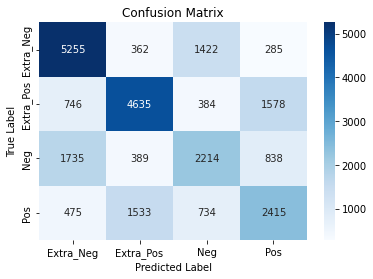

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

# Create a Multinomial Naive Bayes classifier object
print("Initializing...")
nb = MultinomialNB(alpha=1.50)

# Train the classifier on the training data
print('Fitting...')
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
# Evaluate the accuracy of the classifier on the testing data
print('Evaluting...')
# accuracy = nb.score(X_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print the classification report
print(classification_report(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Extra_Neg', 'Extra_Pos', 'Neg', 'Pos'],
            yticklabels=['Extra_Neg', 'Extra_Pos', 'Neg', 'Pos'])

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Random Froest Classifier

Initializing...
Fitting...
Predicting...
              precision    recall  f1-score   support

   Extra_Neg       0.56      0.79      0.66      7324
   Extra_Pos       0.54      0.73      0.62      7343
         Neg       0.47      0.16      0.24      5176
         Pos       0.44      0.27      0.33      5157

    accuracy                           0.53     25000
   macro avg       0.50      0.49      0.46     25000
weighted avg       0.51      0.53      0.49     25000



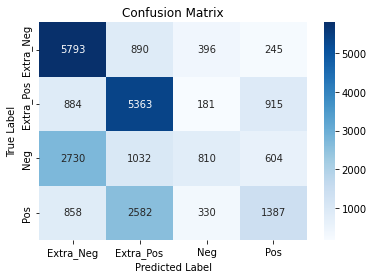

In [112]:

from sklearn.ensemble import RandomForestClassifier
# Instantiate a RandomForestClassifier model with default hyperparameters
print("Initializing...")
rf_model = RandomForestClassifier()

# Fit the model on the training data
print('Fitting...')
rf_model.fit(X_train, y_train)

# Predict the labels of the test data
print('Predicting...')
y_pred = rf_model.predict(X_test)

# Evaluate the model performance on the test data
print(classification_report(y_test, y_pred))



# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Extra_Neg', 'Extra_Pos', 'Neg', 'Pos'],
            yticklabels=['Extra_Neg', 'Extra_Pos', 'Neg', 'Pos'])

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




## Ensemble Method

Models Initializing...
Fitting...
Ensemble model accuracy:  0.55675


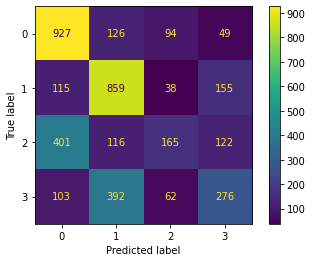

              precision    recall  f1-score   support

   Extra_Neg       0.60      0.78      0.68      1196
   Extra_Pos       0.58      0.74      0.65      1167
         Neg       0.46      0.21      0.28       804
         Pos       0.46      0.33      0.38       833

    accuracy                           0.56      4000
   macro avg       0.52      0.51      0.50      4000
weighted avg       0.54      0.56      0.53      4000



In [17]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Define the individual models
print("Models Initializing...")
model1 = RandomForestClassifier(n_estimators=100)
model2 = GradientBoostingClassifier()
model3 = SVC(probability=True)

# Define the ensemble model with the individual models
ensemble_model = VotingClassifier(estimators=[('rf', model1), ('gb', model2), ('svc', model3)], voting='soft')

# Fit the ensemble model on the training data
print('Fitting...')
ensemble_model.fit(X_train, y_train)


# Evaluate the ensemble model on the test data
ensemble_accuracy = ensemble_model.score(X_test, y_test)
print("Ensemble model accuracy: ", ensemble_accuracy)

y_pred = ensemble_model.predict(X_test)
# Draw the confusion Matrix 
cm = confusion_matrix( y_test,y_pred)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

print(classification_report(y_test, y_pred))


## Output Table

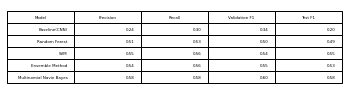

In [6]:


# # create a dataframe
data = {
    'Model': ['Baseline(CNN)', 'Random Forest', 'SVM', 'Ensemble Method', 'Multinomial Navie Bayes'],
    'Precision': ['0.24','0.51','0.55','0.54','0.58'],
    'Recall':['0.30','0.53','0.56','0.56','0.58'],
    'Validation F1': ['0.34', '0.50','0.54','0.55','0.60'],
    'Test F1': ['0.20', '0.49', '0.55','0.53', '0.58']
}
df = pd.DataFrame(data)

# plot the dataframe as a table
fig, ax = plt.subplots(figsize = (6,1.5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# save the table as a PNG image
plt.savefig('F1Table.png', dpi=300, bbox_inches='tight')


# x = ['Baseline(CNN)', 'RF', 'SVM', 'Ensemble', 'Multi NB']
# y = [0.20, 0.49, 0.55,0.53, 0.58]

# # Create bar chart
# plt.bar(x, y)
# # plt.ylim(0, max(y)+10)
# # Add title and labels
# plt.title('Model Performance on F1 Score')

# plt.ylabel('F1')

# # Display the chart
# plt.show()
# plt.savefig('table.png', dpi=300, bbox_inches='tight', format='png')
# # x = ['Extra_Neg', 'Extra_Pos', 'Neg', 'Pos']
# # y = [7324, 7343, 5176,5157]

# # Create bar chart
# plt.bar(x, y)
# # plt.ylim(0, max(y)+10)
# # Add title and labels
# plt.title('Multi-class Counts of aclImdb corpus')
# plt.xlabel('Label')
# plt.ylabel('Count')

# # Display the chart
# plt.show()
# plt.savefig('count.png', dpi=300, bbox_inches='tight', format='png')